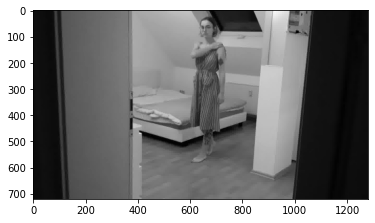

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

datadir = "/home/v/ais/nn/datasets/Frankenstein-set"
cats = ["Standing","Fallen"]

for cat in cats:
    path = os.path.join(datadir, cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

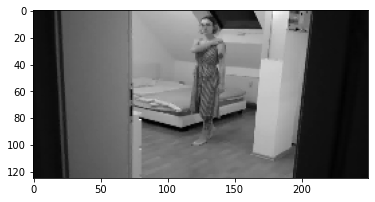

In [34]:
imgsize = 125

new_array = cv2.resize(img_array, (imgsize*2,imgsize))
plt.imshow(new_array, cmap="gray")
plt.show()

In [35]:
train_data = []

def create_training_data():
    for cat in cats:
        path = os.path.join(datadir, cat)
        class_num = cats.index(cat)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (imgsize*2,imgsize))
                train_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()

In [36]:
print(len(train_data))

13781


In [39]:
import random

random.shuffle(train_data)

In [40]:
for sample in train_data[:10]:
    print(sample[1])

1
1
0
0
0
0
1
0
0
0


In [25]:
X = []
y = []

for features, label in train_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, imgsize, imgsize*2, 1) # last one to 3 for color + some other changes

In [26]:
import pickle

pickle_out = open("real-X3.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("real-y3.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()